<a href="https://colab.research.google.com/github/Charlee0616/Data-Mining/blob/main/Q%26Cproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
import math
from sklearn.model_selection import train_test_split
from statistics import mean, stdev
from sklearn.metrics import accuracy_score

In [73]:
def Attribute_selection_method(dataset, target, method, classification):
  if(method == "classification"): #method chosen was classification
    features = dataset.columns[dataset.columns != target]
    entropies=[]
    for attribute in features:
      entropy = 0
      overall = len( dataset )
      vals = dataset[attribute].unique()
      if(classification =="entropy"): #classifcation was chosen and entropy was chosen
        for val in vals:
            subset= dataset[ dataset[attribute] == val ]
            subset_size = len(subset)
            weight = subset_size / overall
            if subset_size > 0:
              props = subset[target].value_counts( normalize=True )
              for p in props.array:
                entropy =  entropy - weight*(p*math.log2(p))
        entropies.append(entropy)
      elif classification == "Gini": #classification was chosen and Gini was chosen
          for val in vals:
            left = dataset[ dataset[attribute] <= val ]
            right = dataset[ dataset[attribute] > val ]
          for subset in [left, right]:
            subset_size = len(subset)
            weight = subset_size / overall
            if subset_size > 0:
              props = subset[target].value_counts( normalize=True )
              gini = 1 - sum(p**2 for p in props if p > 0)
              entropy += weight * gini
          entropies.append(entropy)
    minEnt=min(entropies)
    ind=entropies.index(minEnt)
    return features[ind]

  elif(method == "NaiveBayes"): # method is Naive Bayes Classifier/ regressor
    num_attributes = dataset.select_dtypes( include = ['int64','float64']).columns
    test = dataset[num_attributes[num_attributes!=target]]
    #Summarize statistic
    summaries = []
    for i in range(len(test.columns)):
      meany=[]
      name=test.columns[i]
      for j in range(len(test)):
        meany.append(test[name].get(j))
      name=test.columns[i]
      data=([name],(mean(meany)),(stdev(meany)))
      summaries.append(data)
    predictions = []
    #put test into the method
    for index in range(len(dataset.columns)):
      total_rows = len(test)
      probabilities = []
      class_summaries=len(summaries)
      for i in range(class_summaries):
        probabilities.append(summaries[0][2]/float(total_rows))
        stdev_val=summaries[i][2]
        mean_val=summaries[i][1]
        exponent = math.exp(-((i-mean_val)**2 / (2 * stdev_val**2 )))
        probabilities[i] *=(1 / (math.sqrt(2 * math.pi) * stdev_val)) * exponent
      #determine the best label
      best_label, best_prob = None, -1
      for k in range(len(probabilities)):
        if best_label is None or probabilities[k] > best_prob:
          best_prob = probabilities[k]
          best_label = summaries[k][0]
  return best_label

In [74]:
shrooms = pd.read_csv("https://raw.githubusercontent.com/Qu1nnD/CS290/main/data/mushroom_cleaned.csv") # categorical dataset / classification dataset
StudentPerform = pd.read_csv("https://github.com/Charlee0616/Data-Mining/raw/main/StudentPerformanceFactors.csv") # numerical dataset / regression dataset
shrooms.describe()
StudentPerform.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [75]:
StudentPerform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [76]:
#Testing and Training data for Shrooms dataset
C_train_set, C_test_set = train_test_split(shrooms, test_size=0.2)
C_train_set = C_train_set[['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'class']]
C_test_set = C_test_set[['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color','stem-height', 'stem-width', 'stem-color', 'class']]
C_X_train = C_train_set[['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color','stem-height', 'stem-width', 'stem-color']]
C_y_train = C_train_set["class"]
C_X_test = C_test_set[['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color','stem-height', 'stem-width', 'stem-color']]
C_y_test = C_test_set["class"]
cat_attributes=[]
num_attributes=[]
for col in C_X_train.columns:
  if len(C_X_train[col].unique()) < 20:
    cat_attributes.append(col)
  else:
    num_attributes.append(col)
trf = [ ('num', StandardScaler(), num_attributes),
       ('cat', OneHotEncoder( handle_unknown='ignore'), cat_attributes) ]
col_transform = ColumnTransformer( transformers = trf )
pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier(max_depth=3))])
model = pipeline.fit(C_X_train, C_y_train)
y_pred = pipeline.predict(C_X_test)

In [77]:
#Training the data from the Student performance dataset
R_train_set, R_test_set = train_test_split(StudentPerform, test_size=0.2)
num_attributes = R_train_set.select_dtypes( include = ['int64','float64']).columns
R_X_train = R_train_set[num_attributes[num_attributes!="Exam_Score"]]
R_y_train = R_train_set["Exam_Score"]
R_X_test = R_test_set[num_attributes[num_attributes!="Exam_Score"]]
R_y_test = R_test_set["Exam_Score"]

In [78]:
CatentropyTest = Attribute_selection_method(shrooms, "class", "classification", "entropy")
CatentropyTest

'stem-width'

In [79]:
CatginiTest = Attribute_selection_method(shrooms, "class", "classification", "Gini")
CatginiTest

'cap-shape'

In [80]:
NumRegressorTest = Attribute_selection_method(StudentPerform, "Exam_Score", "NaiveBayes", "regression")
NumRegressorTest

['Tutoring_Sessions']

In [81]:
#sklearn's Classification Tree Accuracy
print("Base Model Performance:")
print(f"Accuracy: {accuracy_score(C_y_test, y_pred):.2f}")

Base Model Performance:
Accuracy: 0.66


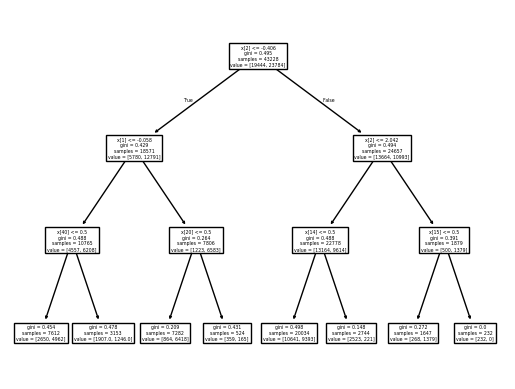

In [82]:
tree=plot_tree( pipeline.named_steps['clf'])

In [83]:
X = shrooms[[CatentropyTest]]
y = shrooms["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [84]:
# Our Entropy Classification Tree Accuracy
print("Our Entropy Classification Model Performance:")
print(f"Accuracy: {accuracy:.2f}")

Our Entropy Classification Model Performance:
Accuracy: 0.61


In [85]:
X = shrooms[[CatginiTest]]
y = shrooms["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [86]:
# Our Gini Classification Tree Accuracy
print("Our Gini Classification Model Performance:")
print(f"Accuracy: {accuracy:.2f}")

Our Gini Classification Model Performance:
Accuracy: 0.57


In [87]:
#sklearn's Regression Tree Accuracy
Regression_tree_model = DecisionTreeRegressor()
Regression_tree_model.fit(R_X_train, R_y_train)
R_y_pred_dt = Regression_tree_model.predict(R_X_test)
print("Decision Tree Regressor Model Performance:")
print(f"Accuracy: {accuracy_score(R_y_test, R_y_pred_dt):.2f}")

Decision Tree Regressor Model Performance:
Accuracy: 0.19


In [89]:
X = StudentPerform['Tutoring_Sessions']
y = StudentPerform["Exam_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
bins = np.linspace(y.min(), y.max(), num=4)
y_test_binned = np.digitize(y_test, bins)
y_pred_binned = np.digitize(y_pred, bins)
accuracy = accuracy_score(y_test_binned, y_pred_binned)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [ ]:
# Our regression tree accuracy
print("Our Regression Model Performance:")
print(f"Accuracy: {accuracy_score():.2f}")